<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMinig/blob/main/20231115/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0%E3%81%AE%E6%BC%94%E7%BF%92%E3%81%AE%E8%A7%A3%E7%AD%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データマイニング第8回（2023/11/15）


#本日の講義の目的

クラスタリング手法に関する演習を行う

## 本日の講義の資料

以下のサイトに保存してある。

https://github.com/yajima-yasutoshi/DataMinig/tree/main/20231115


# 準備

In [ ]:
# インストール
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=bb89d0b2c7a1bb0c9541a5bd4005611b3d210d91457bfced8002b9c1488e5bf4
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


## 必要なライブラリーのインポート

In [ ]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# Wineデータをつかった例

今回の演習では、sklearn に組み込まれているサンプルデータを用いる。
データの読み込みは、以下のように行う。

In [ ]:
from sklearn.datasets import load_wine
# データの読み込み
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

データの確認を行う。主な確認ポイントは以下の通りである。


*   レコード数
*   項目数
*   各項目の型
*   欠損値の有無
*   異常値の有無


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## 利用するデータ概要

Wineデータセットは、イタリアの同じ地域で栽培された3種類のワインに
含まれる成分を測定したデータ。
13の項目がある。

| 項目                          | 説明                                       |
|---------------------------------|--------------------------------------------|
| Alcohol（アルコール）           | ワインに含まれるアルコールの量。           |
| Malic Acid（リンゴ酸）          | ワインに含まれるリンゴ酸の量。             |
| Ash（灰分）                     | ワインの灰分の量。                         |
| Alcalinity of Ash（灰分のアルカリ度） | 灰分のアルカリ度。                   |
| Magnesium（マグネシウム）       | ワインに含まれるマグネシウムの量。         |
| Total Phenols（総フェノール）   | ワインに含まれるフェノール類の総量。       |
| Flavanoids（フラバノイド）      | ワインに含まれるフラバノイドの量。         |
| Nonflavanoid Phenols（非フラバノイドフェノール） | ワインに含まれる非フラバノイドフェノールの量。 |
| Proanthocyanins（プロアントシアニン） | ワインに含まれるプロアントシアニンの量。 |
| Color Intensity（色の強度）     | ワインの色の強度。                         |
| Hue（色相）                     | ワインの色相。                             |
| OD280/OD315 of Diluted Wines（希釈ワインのOD280/OD315） | 希釈されたワインのOD280/OD315の比率。 |
| Proline（プロリン）             | ワインに含まれるプロリンの量。             |

### 項目の選択

In [ ]:
# 相関行列を計算
correlation_matrix = df.corr().abs()
# sns.heatmap(correlation_matrix, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

# 相関が0.6以上の変数を取得
high_corr_var = {}
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.6:
            colname = correlation_matrix.columns[i]
            high_corr_var[colname] = abs(correlation_matrix.iloc[i, j])

# 相関性の高い変数を削除
df.drop(columns=high_corr_var.keys(), inplace=True)

# 結果の表示
# print("Remaining columns after removing highly correlated variables:")
print(df.columns)
df.info()

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'nonflavanoid_phenols', 'color_intensity', 'hue'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   alcalinity_of_ash     178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   nonflavanoid_phenols  178 non-null    float64
 7   color_intensity       178 non-null    float64
 8   hue                   178 non-null    float64
dtypes: float64(9)
memory usage: 12.6 KB


クラスタリングの処理を簡単にするため上記の9項目に限定して行う。

### 基本統計量を得る

数値型の項目の場合、最小値や最大値、平均や標準偏差といった数値を**基本統計量**
と呼び、分析の前には必ず確認する必要がある。

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,color_intensity,hue
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,0.361854,5.058090,0.957449
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.124453,2.318286,0.228572
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.130000,1.280000,0.480000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,0.270000,3.220000,0.782500
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,0.340000,4.690000,0.965000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,0.437500,6.200000,1.120000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,0.660000,13.000000,1.710000


### 数値型項目に関する確認事項

*   分布の形状（山が一つか？）、左右の偏りの確認。
*   分布の端が極端に離れていないか。外れ値がある可能性。
*   変数間の相関

In [ ]:
sns.pairplot( data = df)

### 外れ値の確認

外れ値とは、極端に大きな値や小さな値のことである。箱ひげ図を描くことで視覚的に確認ができる。

項目 alcohol に外れ値があるか、箱ひげ図を描いて確認する。

<Axes: >

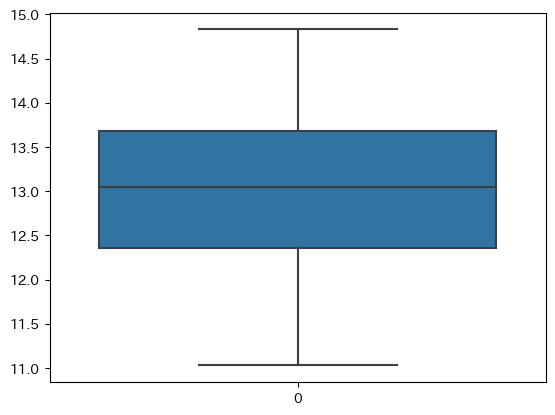

In [ ]:
sns.boxplot(df['alcohol'])

項目 malic_acid に外れ値があるか、箱ひげ図を描いて確認する。

<Axes: >

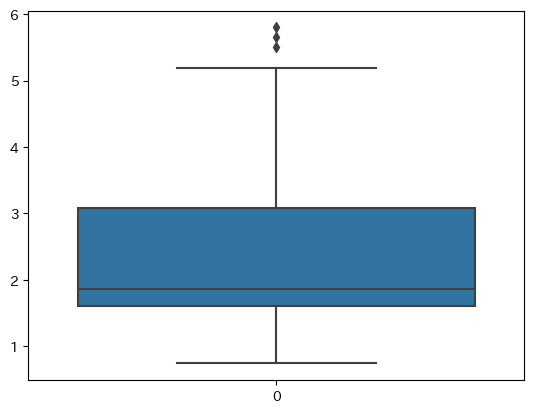

In [ ]:
sns.boxplot(df['malic_acid'])

箱ひげ図の上の横棒の値は、

> 箱の上＋1.5×箱の長さ

である。下の横棒は、

> 箱の下ー1.5×箱の長さ

また、箱の上は第三四分位、箱の下は第一四分位に相当する。

項目 malic_acid の上の横棒の値を計算する。

In [15]:
q3 = df['malic_acid'].quantile(0.75)
q1 = df['malic_acid'].quantile(0.25)

q3 + 1.5 * ( q3 - q1 )

5.3025

In [16]:
df[df['malic_acid']>5.30]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,color_intensity,hue,cluster
123,13.05,5.80,2.13,21.5,86.0,2.62,0.30,2.6,0.73,1
137,12.53,5.51,2.64,25.0,96.0,1.79,0.63,5.0,0.82,1
173,13.71,5.65,2.45,20.5,95.0,1.68,0.52,7.7,0.64,1


In [17]:
df.sort_values(by = 'malic_acid', ascending=False)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,color_intensity,hue,cluster
123,13.05,5.80,2.13,21.5,86.0,2.62,0.30,2.60,0.73,1
173,13.71,5.65,2.45,20.5,95.0,1.68,0.52,7.70,0.64,1
137,12.53,5.51,2.64,25.0,96.0,1.79,0.63,5.00,0.82,1
155,13.17,5.19,2.32,22.0,93.0,1.74,0.61,7.90,0.60,1
146,13.88,5.04,2.23,20.0,80.0,0.98,0.40,4.90,0.58,1
...,...,...,...,...,...,...,...,...,...,...
68,13.34,0.94,2.36,17.0,110.0,2.53,0.55,3.17,1.02,2
80,12.00,0.92,2.00,19.0,86.0,2.42,0.30,2.50,1.38,0
76,13.03,0.90,1.71,16.0,86.0,1.95,0.24,4.60,1.19,0
84,11.84,0.89,2.58,18.0,94.0,2.20,0.22,3.05,0.79,0


なお、以降は外れ値の除外などは行わずに実行する。

In [24]:
# 標準化に必要なライブラリーのインポート
from sklearn.preprocessing import StandardScaler
# 前処理（データの正規化）
X = df
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# クラスタリングに必要なライブラリーのインポート
from sklearn.cluster import KMeans


# Elbow Methodによるハイパーパラメータチューニング
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

<Axes: xlabel='Num of clusters', ylabel='Inertia'>

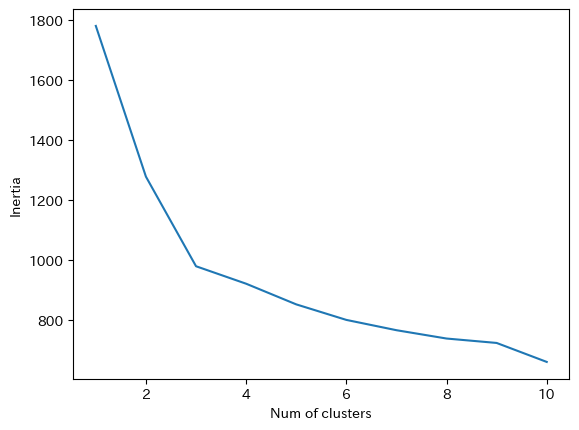

In [26]:
# グリッド線を表示する場合は以下を行う
# sns.set_style('whitegrid')

# エルボー図のプロット
elbow = pd.DataFrame( inertia, columns = ['Inertia'])
elbow['Num of clusters'] = range(1,11)
sns.lineplot(data = elbow, x='Num of clusters', y= 'Inertia')

In [27]:
# 最適なクラスタ数でKMeansクラスタリング（この例では、エルボーが3であると仮定）
best_n_clusters = 3  # エルボー図から選択
kmeans = KMeans(n_clusters=best_n_clusters, init='k-means++', max_iter=300, n_init='auto')
kmeans.fit(X)

# クラスタラベルをデータフレームに追加
df['cluster'] = kmeans.labels_

# 各クラスタの特徴を調査（平均値、標準偏差など）
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,color_intensity,hue
,,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,12.284848,1.783485,2.199394,19.378788,93.121212,2.223939,0.347727,3.155758,1.057818
1,1,13.745254,1.959492,2.471695,17.408475,108.372881,2.866441,0.293559,5.471356,1.073051
2,2,13.063019,3.444340,2.457547,21.962264,98.377358,1.747736,0.455472,6.966981,0.703774


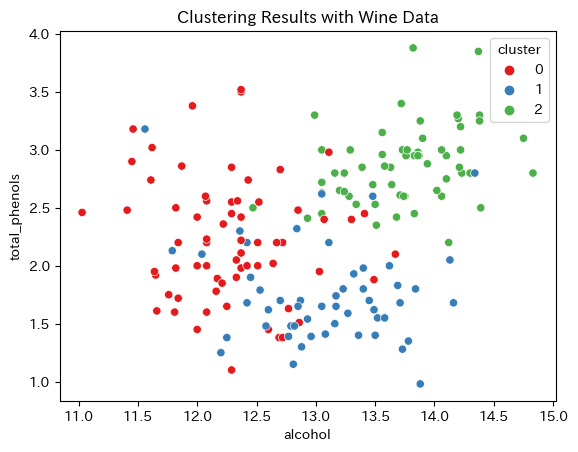

In [14]:
# 結果の可視化（seabornを使用）
sns.scatterplot(x='alcohol', y='total_phenols', hue='cluster', data=df, palette='Set1')
plt.title('Clustering Results with Wine Data')
plt.show()